[View in Colaboratory](https://colab.research.google.com/github/alvarogutyerrez/alvarogutyerrez/blob/master/S04_aplicaciones.ipynb)

#Sesión 4: Aplicaciones Miscelaneas 


En esta sesión veremos un par de aplicaciones haciendo uso de lo aprendido en las sesiones anteriores. Partiremos con cálculos de complejidad computacional, recuperando el tiempo que le toma a nuestro computador realizar ciertas operaciones recursivas. Luego veremos una aplicación financiera usando el comando shift. Finalmente reclasificaremos una variable continua utilizando **bins** y la función **pd_cut**.


## (1) Complejidad  Computacional

  Utilizando data sintética cree un gráfico que muestre la complejidad computacional _``O()''_ (tiempo de calculo en cada iteración) para la estimación de un modelo lineal como el de la Ecuación  cuando la cantidad de columnas $m$ de la Matriz $X$ va aumentando.
    
 $$
    Y_{i}=c+ \sum_{m=1}^{M} X_{i,m}\theta_{m} + \varepsilon_{i}  \;\;\; \forall i \in \left\{1,...,N \right\} 
$$

 1.- El valor de la cantidad de columnas ($m$) en la ecuación debe estar fijo y ser igual a 10. Por otro lado, número de columnas ($n$) debe partir en 10 y llegar hasta 100.000.000 cuando acabe el loop.
 
 2.- El número de filas ($n$) en la regresión debe aumentar en 10.000 en cada iteración.
           
3.- Su ciclo debe contener un quiebre que detenga el código si su código llega a las 1.000.000 iteraciones.
                        
4.- Al final de las interaciones su gráfico debe representar en el eje de las abcisas el número de filas de la regresión y en el eje de la ordenada la cantidad de tiempo de ejecución.

##Preliminares (1)

Lo primero que haremos será importar  funciones auxiliares que nos permitirá calcular el tiempo demorado por algún proceso. Estas funciones se llaman tic(), y toc2(). Para mayor detalle de las mismas pueder abrir el archivo ocupando Spyder.

In [0]:
!wget https://www.dropbox.com/s/2ayo637xecc1sfs/tictoc.py 

In [0]:
from tictoc import tic,toc,toc2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd 
import numpy as np

## Inicio del Loop

Lo primer será definir los parámetros del loop, según lo entregado en las instrucciones. A esto, además se ha fijado la semilla 777, que nos dará buena suerte y nos permitirá replicabilidad en nuestros resultados.

In [0]:
np.random.seed(seed=777)
resultado_plus_row = []
n_col = 10 #Numero de columnas
n_row = 10 #Numero de Filas
n_row_final = 100000000 #Numero Maximo de Filas
n_row_delta = 10000 #Delta entre cada iteracion
n_row_limite =1000000 #Condicion de Salida del Loop

## Cuerpo del Loop

Acá está contenida la estructura básica del ciclo, comentada linea a linea.

In [0]:
while n_row<n_row_final:
    Y = np.random.rand(n_row,1)     #Generando la variable explicada
    X = np.random.rand(n_row,n_col) #Generando el vector de regresores
    reg_lineal = LinearRegression() #Declarando el modelo
    tic()                           #Inicio del conteo del tiempo
    reg_lineal.fit(X, Y)            #Estimando el modelo
    toc_sklearn_linear_reg = toc2() #Registro final del tiempo ocupado
    a=[n_row,toc_sklearn_linear_reg]#Generamos lista que ocuparemos para hacer append
    resultado_plus_row.append(a)    #Append a la lista vacia del inicio
    #print(toc_sklearn_linear_reg)   #Imprimir en pantalla
    n_row=n_row +n_row_delta        #Numero de fila actual + delta de avance
    #print(n_row)                    #Imprimiendo en Pantalla
    if n_row>n_row_limite:          #Condicion de Salida
        break                       #Breakkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

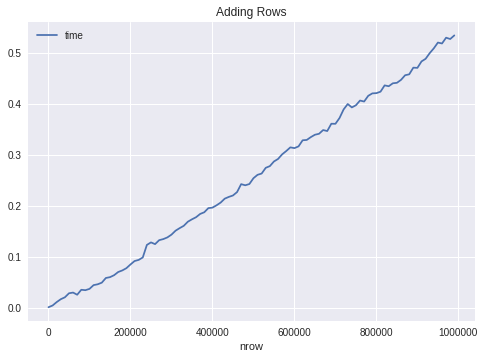

In [33]:
resultado_plus_row_df = pd.DataFrame(resultado_plus_row,columns = ['nrow', 'time'])
graph=resultado_plus_row_df.plot(x='nrow', y='time',kind='line',title='Adding Rows')    


# Cálculo de Retornos 

### Función Shift

Esta función nos permitirá generar rezagos o leads de las variables 

In [0]:
!wget https://www.dropbox.com/s/3vo2v28ho7o59ms/data_usd-clp.xlsx
!pip install xlrd  

## Load Data

In [35]:
data=pd.read_excel("data_usd-clp.xlsx")
dolar_hoy     = data.iloc[:,0]
dolar_hoy.head(4)

2012-12-28    479.470
2012-12-31    476.404
2013-01-01    475.382
2013-01-02    474.360
Name: USDCLP Curncy, dtype: float64

### Rezago de la Variable

In [36]:
dolar_lag1     = dolar_hoy.shift(1).copy(True)
dolar_lag1.head(4)

2012-12-28        NaN
2012-12-31    479.470
2013-01-01    476.404
2013-01-02    475.382
Name: USDCLP Curncy, dtype: float64

### Calculando el delta entre ayer y hoy

In [37]:
delta = dolar_lag1 -dolar_hoy
delta.head(4)

2012-12-28      NaN
2012-12-31    3.066
2013-01-01    1.022
2013-01-02    1.022
Name: USDCLP Curncy, dtype: float64

### Cálculo del retorno

In [38]:
ret = delta/dolar_lag1
ret.head(10)

2012-12-28         NaN
2012-12-31    0.006395
2013-01-01    0.002145
2013-01-02    0.002150
2013-01-03    0.004090
2013-01-04   -0.001482
2013-01-07    0.003762
2013-01-08   -0.001931
2013-01-09    0.002753
2013-01-10    0.000361
Name: USDCLP Curncy, dtype: float64

## Calculo de Intervalos (bins)

Esta pequeña rutina nos permitirá recodificar una variable continua en una categórica. En este caso definiremos una banda sobre la cual existirán variaciones del tipo de cambio en las que se declararán como cero,ya que no hubo un cambio considerable. Por otro lado, tendremos algunos datos categorizados con un 1, cuando el retorno sea anormalmente alto y con un -1 cuando sea anormalmente bajo.

In [39]:
tolerancia = 0.0015
bins=[-100000,-1*tolerancia,tolerancia,100000]
group_names=[-1,0,1]
clasificacion=pd.to_numeric(pd.cut(ret,bins,labels=group_names))     
clasificacion.head(10)


2012-12-28    NaN
2012-12-31    1.0
2013-01-01    1.0
2013-01-02    1.0
2013-01-03    1.0
2013-01-04    0.0
2013-01-07    1.0
2013-01-08   -1.0
2013-01-09    1.0
2013-01-10    0.0
Name: USDCLP Curncy, dtype: float64

# Training and Testing 


Una práctica usual dentro del Machine Learning, es particionar la data en muestras de entrenamiento (Training) y de comprobación (Testing). La idea de esto, es ver la capacidad predictiva que pueden tener los modelos entrenados en Training, sobre la muestra de Training. Para esto definiremos una fecha de corte, que separará las aguas entre ambas bases.


## Generando Training 

In [46]:
corte='2014-03-13'
x_tr =data.iloc[:,1:-1].copy(True)
x_tr =x_tr[data.index<corte].copy(True)

y_tr =data.iloc[:,0].copy(True)
y_tr =y_tr[data.index<corte].copy(True)

x_tr.head(7)





,USSW1 Curncy,USSW10 Curncy,CHSWP1 ICCH Curncy,CHSWP10 Curncy,CCHIL1U5 CBIN Curncy,HGA Comdty,CL1 Comdty,VIX Index
2012-12-28,0.3340,1.7630,5.23,5.47,72.603,344.35,90.80,22.72
2012-12-31,0.3240,1.8395,5.26,5.47,72.479,350.65,91.82,18.02
2013-01-01,0.3210,1.8395,5.27,5.47,72.136,354.90,92.47,16.35
2013-01-02,0.3205,1.8781,5.28,5.50,70.128,359.15,93.12,14.68
2013-01-03,0.3215,1.9455,5.28,5.53,67.005,357.35,92.92,14.56
2013-01-04,0.3300,1.9360,5.27,5.55,66.833,355.30,93.09,13.83
2013-01-07,0.3280,1.9270,5.28,5.58,68.502,354.05,93.19,13.79


### Entrenando Modelos en Training

In [47]:
    reg_lineal = LinearRegression()
    reg_lineal.fit(x_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Valores Predichos  Muestra de Training

In [48]:
pred_training=reg_lineal.predict(x_tr)  
pred_training = pd.DataFrame(data = pred_training  , index=y_tr.index , columns = {'Prediction_training'})
pred_training.head(10)


,Prediction_training
2012-12-28,473.617465
2012-12-31,468.951798
2013-01-01,466.912320
2013-01-02,466.221788
2013-01-03,467.833662
2013-01-04,468.432517
2013-01-07,470.338144
2013-01-08,470.095554
2013-01-09,471.525092
2013-01-10,470.510319


### Mean Squared Error : Training  

In [49]:
MAE_tr=mean_squared_error(y_tr,pred_training)
MAE_tr

23.557775620923678

##Generando Testing 

In [0]:
x_tst =data.iloc[:,1:-1].copy(True)
x_tst =x_tst[data.index>=corte].copy(True)

y_tst =data.iloc[:,0].copy(True)
y_tst =y_tst[data.index>=corte].copy(True)

### Valores Predichos  Muestra de Testing

In [51]:
pred_testing=reg_lineal.predict(x_tst)  
pred_testing = pd.DataFrame(data = pred_testing  , index=y_tst.index , columns = {'Prediction_testing'})
pred_testing.head(10)

,Prediction_testing
2014-03-13,562.114190
2014-03-14,562.005663
2014-03-17,559.271485
2014-03-18,559.236018
2014-03-19,557.555845
2014-03-20,557.698960
2014-03-21,560.705818
2014-03-24,561.772404
2014-03-25,559.659736
2014-03-26,561.476813


### Mean Squared Error: Testing 

In [52]:
MAE_tst=mean_squared_error(y_tst,pred_testing)
MAE_tst

36185.33142043885